# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

In [46]:
import tensorflow as tf

# Carga de datos desde la plataforma Kaggle

In [3]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [1]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.11-py3-none-any.whl size=114545 sha256=77fb7e0557db3223eef37554be46a923de4810abb304f9e2e8b40f8a491ee313
  Stored in directory: /root/.cache/pip/wheels/fa/9f/ba/ec48d872e799857a3e375ea86dfde7c0c147a418b49bca20ef
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [7]:
%%capture
# Seleccionar el API Token personal previamente descargado (fichero kaggle.json)
from google.colab import files
files.upload()

MessageError: TypeError: Cannot read properties of undefined (reading '_uploadFiles')

In [8]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          23456        465  0.9411765        
sahilnbajaj/loans-data                                      Loans Data                                     213KB  2024-04-07 15:08:37            869         24  1.0              
sahirmaharajj/air-pollution-dataset                         Air Pollution Dataset                          213KB  2024-04-07 13:14:48            949         29  1.0              
sanyamgoyal401/customer-purchases-behaviour-dataset         Customer Purchases Behaviour Dataset         

In [10]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición

!kaggle datasets download -d gpiosenka/100-bird-species

#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
 99% 1.93G/1.96G [00:08<00:00, 258MB/s]
100% 1.96G/1.96G [00:08<00:00, 252MB/s]


In [11]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

In [12]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip 100-bird-species.zip -d my_dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: my_dataset/train/WHITE TAILED TROPIC/120.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/121.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/122.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/123.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/124.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/125.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/126.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/127.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/128.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/129.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/130.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/131.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/132.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/133.jpg  
  inflating: my_dataset/train/WHITE TAILED TROPIC/134.jpg  
  inflating: my_dataset/train/WHITE TAI

In [13]:
!unzip my_dataset/test.zip

unzip:  cannot find or open my_dataset/test.zip, my_dataset/test.zip.zip or my_dataset/test.zip.ZIP.


In [14]:
%%capture
!ls test/

## Ejemplo de escritura de datos tomando como referencia un BASE_FOLDER

*   Elemento de lista
*   Elemento de lista



In [15]:
# Conectamos con nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
BASE_FOLDER = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"
!mkdir $BASE_FOLDER

mkdir: cannot create directory ‘/content/drive/MyDrive/07MIAR_Proyecto_Programacion/’: File exists


# Exploración de la base de datos

## Se muestra una imagen aleatoria

Text(0.5, 1.0, 'WHITE BROWED CRAKE')

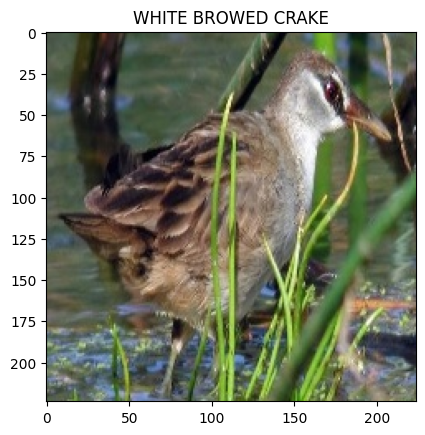

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

# Escogiendo y mostrando una imagen al azar del conjunto de test
idx = np.random.randint(1, 6)
bird = random.choice(os.listdir('my_dataset/test'))
img = cv2.imread(f'my_dataset/test/{bird}/{idx}.jpg', cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(bird)

## Creación del dataset para entrenar

Hay casi 90.000 muestras pertenecientes a 525 clases distintas.

## Análisis del balance de clases

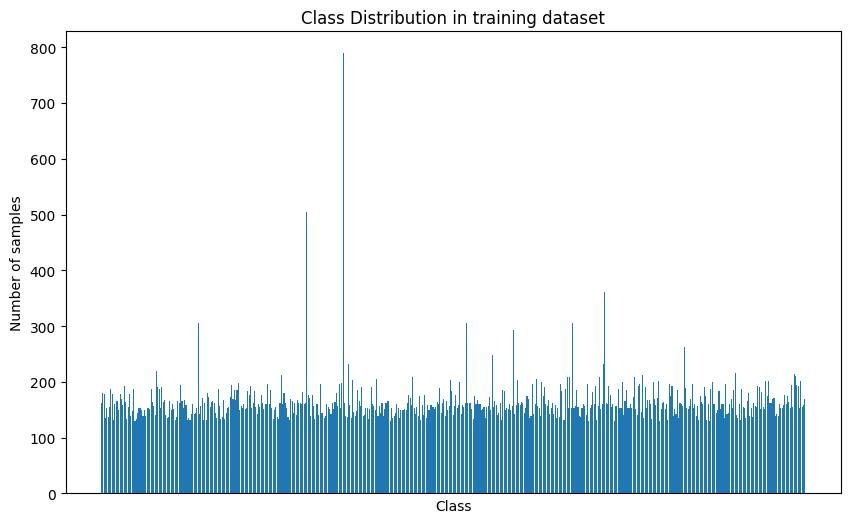

In [35]:
dataset_path = 'my_dataset/train'

# Get class names
class_names = train_dataset.class_names

# Count the number of samples in each class
class_counts = {class_name: 0 for class_name in class_names}
for root, dirs, files in os.walk(dataset_path):
    for class_name in class_names:
        if class_name in root:
            class_counts[class_name] += len(files)
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution in training dataset')
plt.xticks([])
plt.show()

Se puede observar que, salvo unas 10 clases que están mayormente representadas, todas las clases tienen al rededor de 200 muestras.

## Se muestran las clases mayormente representadas

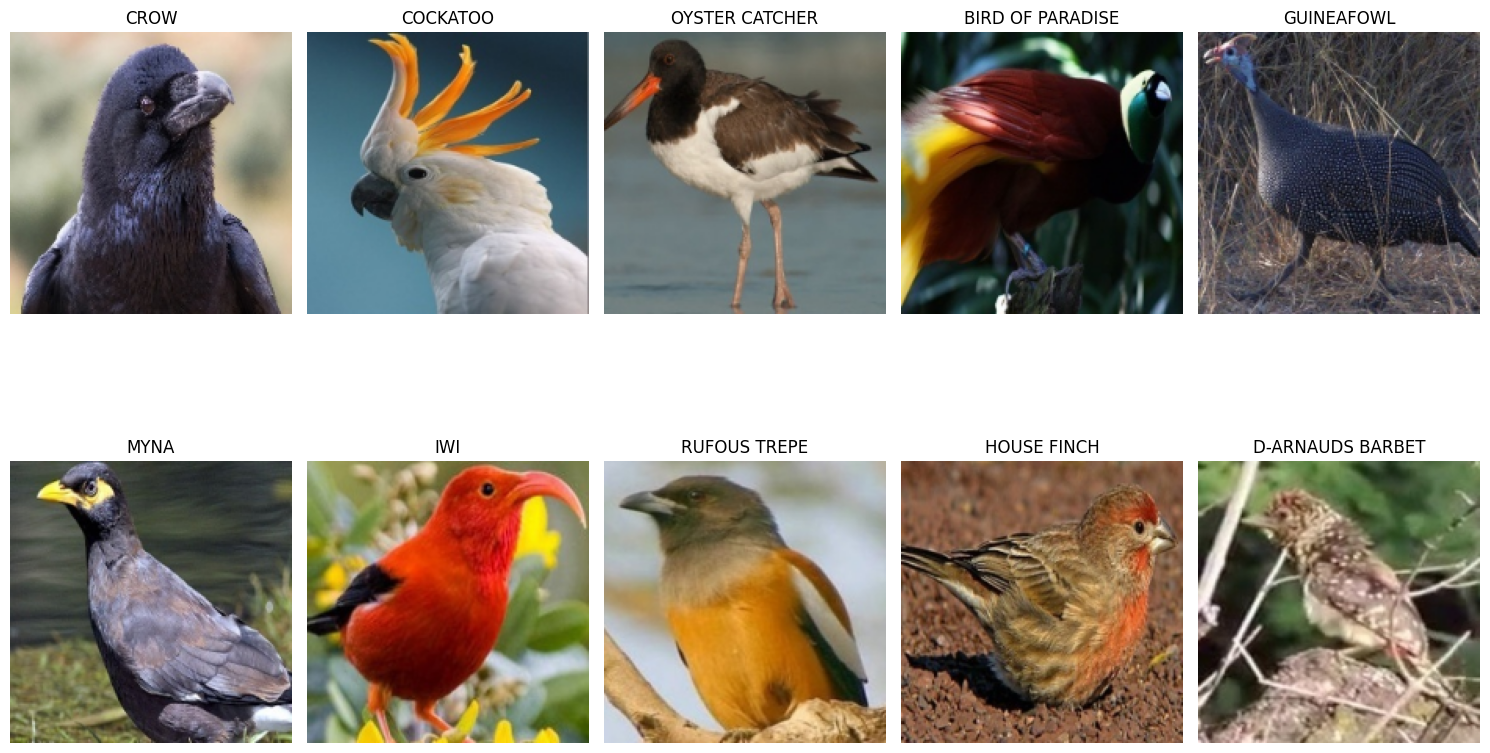

In [40]:
# Sort the classes based on the number of samples and select the top N
sorted_classes = sorted(class_counts.items(), key=lambda item: item[1], reverse=True)
top_classes = sorted_classes[:10]
plt.figure(figsize=(15, 10))

for i, (class_name, _) in enumerate(top_classes, 1):
    class_dir = os.path.join(dataset_path, class_name)
    random_image_file = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, random_image_file)

    # Use OpenCV to read and resize the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))

    # Convert BGR image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Acondicionamiento de los datos

*   Para el acondicionamiento de los datos se va a realizar un diezmado de la resolución de la imagen para reducir el número de operaciones en la convolución.
*   Se mantendrán los tres canales de la imagen, puesto que el color del ave es discriminativo en cuanto a la clasificación de la especie y facilitará el aprendizaje de la red.
*   A priori no se va a realizar data augmentation y se va a estudiar el comportamiento del modelo con el conjunto de datos sin aumentar. Si se detecta que los modelos sobreajustan, se realizará aumento de datos.

In [58]:
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 128
train_dataset = image_dataset_from_directory(
 "my_dataset/train",
    image_size=(224, 224),
    batch_size=batch_size)
test_dataset = image_dataset_from_directory(
   "my_dataset/test",
    image_size=(224, 224),
    batch_size=batch_size)
valid_dataset = image_dataset_from_directory(
   "my_dataset/valid",
    image_size=(224, 224),
    batch_size=batch_size)

print(f"Total dataset number of samples = {len(train_dataset)*batch_size + len(valid_dataset)*batch_size + len(test_dataset)*batch_size}")

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Total dataset number of samples = 90112


In [59]:
import keras
from keras import layers
inputs = keras.Input(shape=(224, 224, 3))

x = layers.Resizing(118,118)(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resizing_2 (Resizing)       (None, 118, 118, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 118, 118, 3)       0         
                                                                 
 batch_normalization_10 (Ba  (None, 118, 118, 3)       12        
 tchNormalization)                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 116, 116, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 58, 58, 32)        0         
 g2D)                                                      

In [60]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [61]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="bird525.keras",
        save_best_only=True,
        monitor="val_loss")]

In [62]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    callbacks=callbacks)

Epoch 1/20
662/662 [==============================] - 112s 159ms/step - loss: 4.4690 - accuracy: 0.1659 - val_loss: 2.6774 - val_accuracy: 0.4118
Epoch 2/20
662/662 [==============================] - 104s 155ms/step - loss: 2.6656 - accuracy: 0.4196 - val_loss: 1.8919 - val_accuracy: 0.5638
Epoch 3/20
662/662 [==============================] - 96s 144ms/step - loss: 1.8448 - accuracy: 0.5687 - val_loss: 1.5184 - val_accuracy: 0.6507
Epoch 4/20
662/662 [==============================] - 98s 148ms/step - loss: 1.3387 - accuracy: 0.6685 - val_loss: 1.4285 - val_accuracy: 0.6663
Epoch 5/20
662/662 [==============================] - 103s 154ms/step - loss: 1.0152 - accuracy: 0.7320 - val_loss: 1.3864 - val_accuracy: 0.6983
Epoch 6/20
662/662 [==============================] - 96s 145ms/step - loss: 0.7760 - accuracy: 0.7854 - val_loss: 1.4769 - val_accuracy: 0.6979
Epoch 7/20
662/662 [==============================] - 98s 147ms/step - loss: 0.6375 - accuracy: 0.8182 - val_loss: 1.4399 - val

Cargar el modelo para evaluar en test

In [ ]:
test_model = keras.models.load_model(
    "bird525.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

Mostrar curva de entrenamiento

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

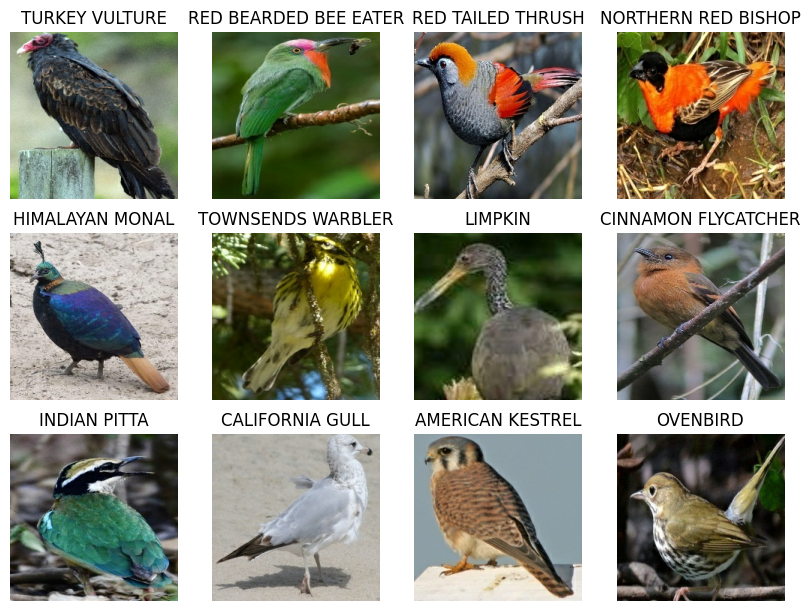

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images,labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Data augmentation para reducir overfitting

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)

volver a entrenar con datos aumentados

## Ejemplo de generación de documento PDF a partir del Colab Notebook (fichero ".ipynb")

In [ ]:
# Ejecutando los siguientes comandos en la última celda del Colab Notebook se convierte de ".ipynb" a PDF
# En caso de querer ocultar la salida de una celda puesto que no tenga relevancia se debe insertar
# el comando %%capture al inicio de la misma. Véase la celda que contiene !ls test en este Notebook.

In [ ]:
name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir='$BASE_FOLDER' '$BASE_FOLDER''$name_IPYNB_file' --to pdf"
        )





[NbConvertApp] Converting notebook /content/drive/MyDrive/07MIAR_Proyecto_Programacion/07MIAR_Proyecto_Programacion.ipynb to pdf
[NbConvertApp] Support files will be in 07MIAR_Proyecto_Programacion_files/
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Writing 43232 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 179055 bytes to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/07MIAR_Proyecto_Programacion.pdf
